In [1]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt


def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

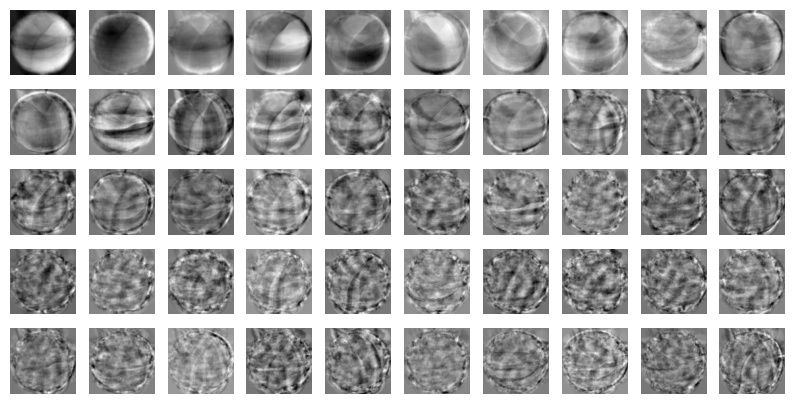

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


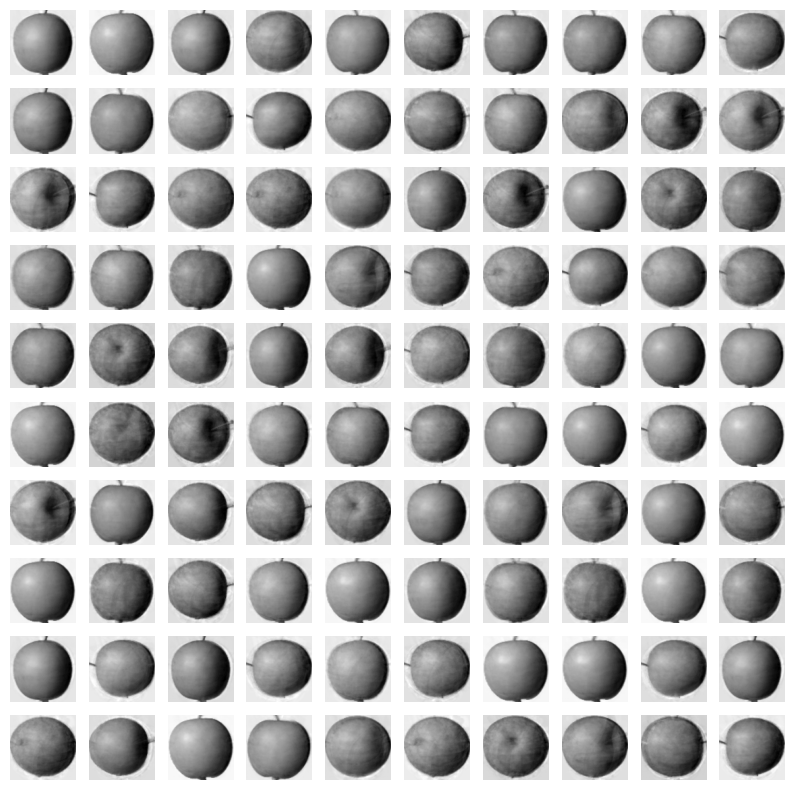

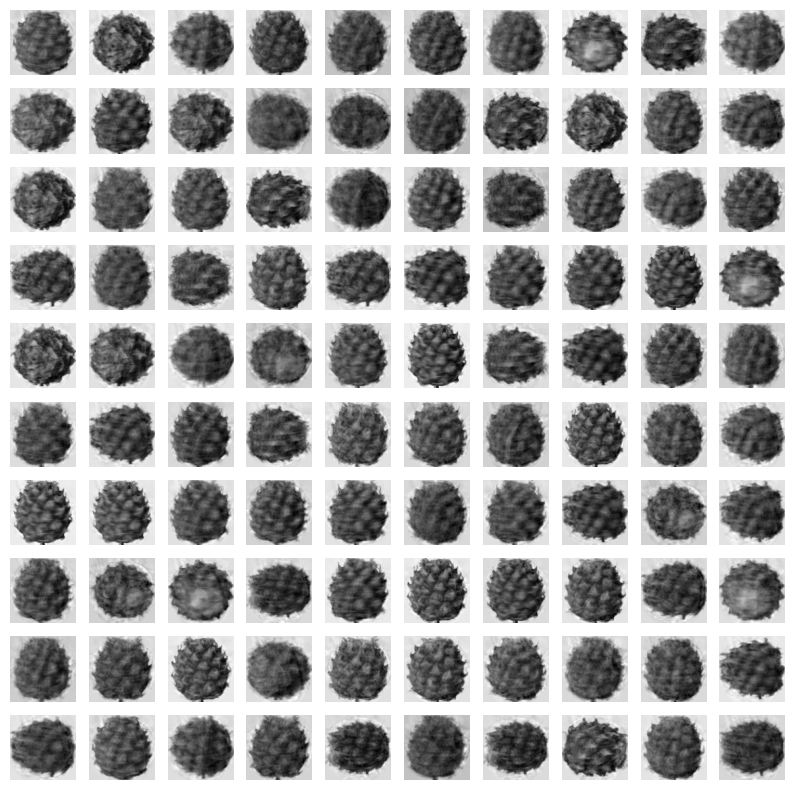

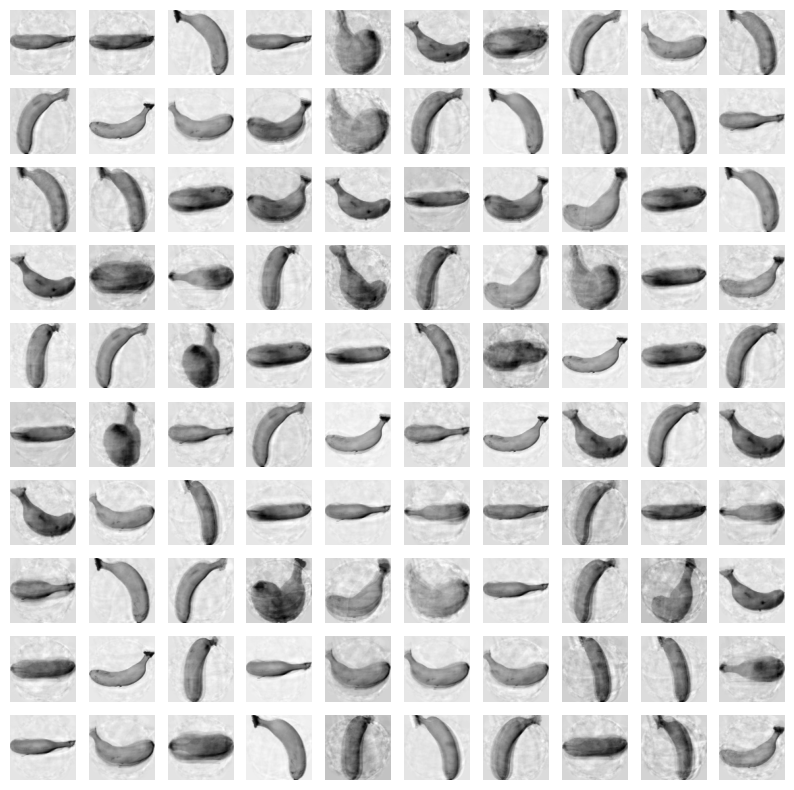

In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start + 100])
    print("\n")

In [13]:
print(np.sum(pca.explained_variance_ratio_))

0.9214780079946229


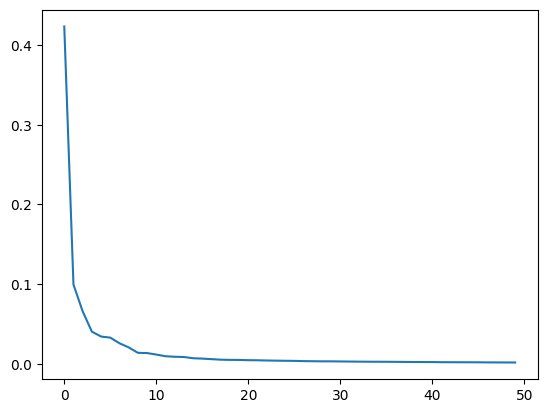

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=-1)

In [20]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [23]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target, n_jobs=-1)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.8647749423980713


In [24]:
scores = cross_validate(lr, fruits_pca, target, n_jobs=-1)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.01779828071594238


In [25]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [26]:
print(pca.n_components_)

2


In [27]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [28]:
scores = cross_validate(lr, fruits_pca, target, n_jobs=-1)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.018653345108032227


In [29]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


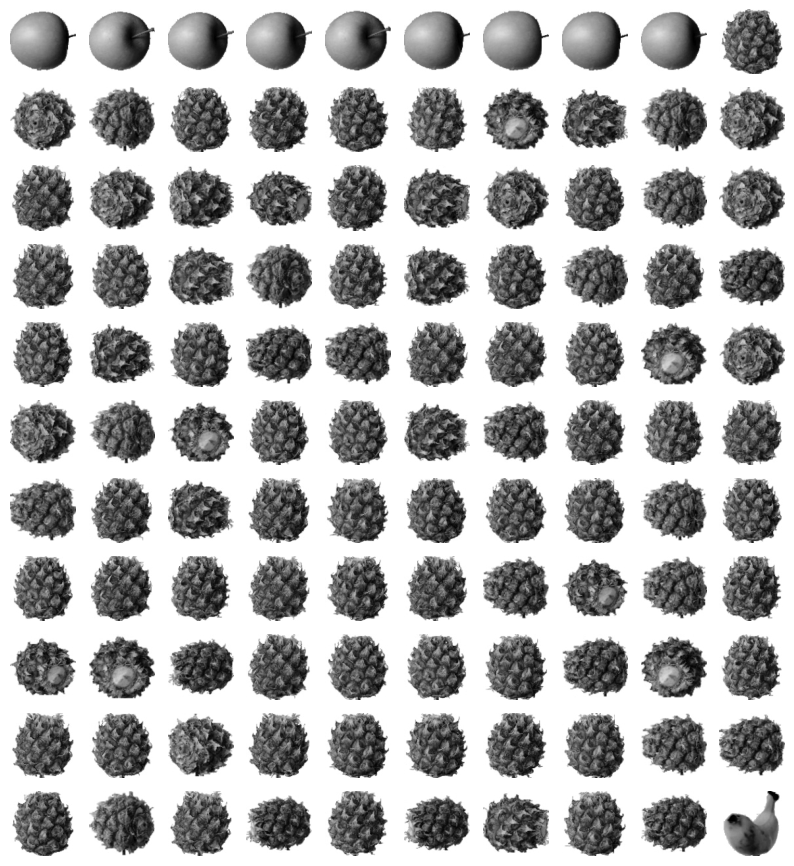

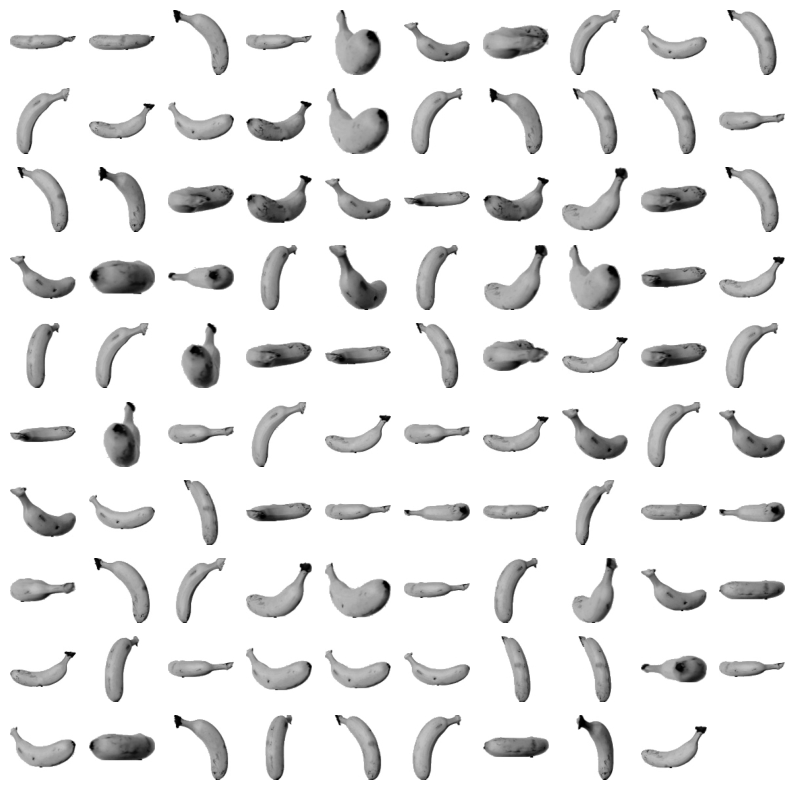

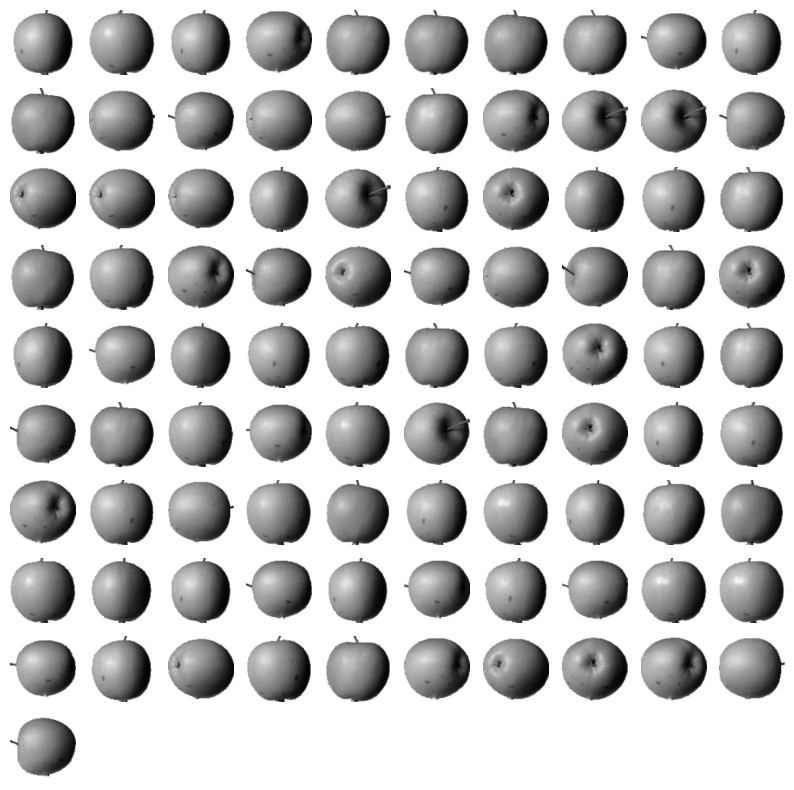

In [30]:
for label in range(3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

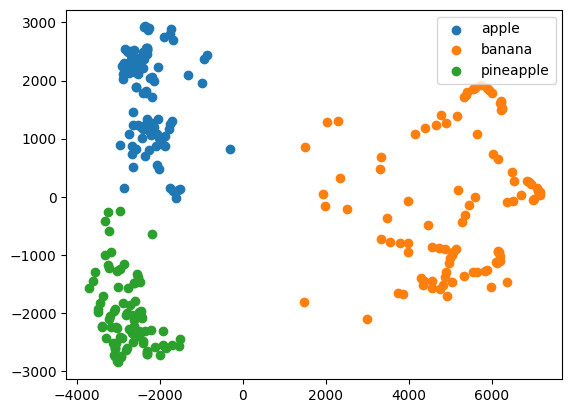

In [31]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()